# The numpy.random package

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()

## What is numpy.random?

### "Simple random data" functions

#### integers

In [3]:
rng.integers(5, size = 20)

array([4, 4, 0, 3, 1, 1, 4, 4, 2, 4, 2, 3, 3, 2, 2, 4, 4, 1, 1, 3],
      dtype=int64)

#### random

In [4]:
rng.random(size = 20)

array([0.91943284, 0.85286891, 0.66738967, 0.88203117, 0.76894469,
       0.00544587, 0.34313315, 0.45301027, 0.01527109, 0.9869636 ,
       0.15589133, 0.48112743, 0.78777714, 0.81489473, 0.79065677,
       0.01964047, 0.37758109, 0.47729335, 0.76147863, 0.2209561 ])

#### choice

In [5]:
rng.choice(10, 3)

array([2, 2, 8], dtype=int64)

In [6]:
colours = ["red", "blue", "green", "black", "yellow"]

In [7]:
rng.choice(colours)

'red'

#### bytes

In [8]:
rng.bytes(5)

b'\xb95\x06\x9ep'

### "Permutations" functions

In [9]:
# Explain In-place vs. copy differences between below functions

#### shuffle

In [10]:
digits = np.arange(10)

In [11]:
digits

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
rng.shuffle(digits)

In [13]:
digits

array([9, 0, 6, 5, 8, 3, 4, 1, 2, 7])

In [14]:
three_by_three = np.arange(9).reshape(3, 3)

In [15]:
three_by_three

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [16]:
# Using shuffle on an array will rearrange the position of rows
# but will leave the items from each row in the original order

In [17]:
rng.shuffle(three_by_three)

In [18]:
three_by_three

array([[6, 7, 8],
       [3, 4, 5],
       [0, 1, 2]])

#### permutation

In [19]:
rng.permutation(10)

array([2, 0, 6, 1, 5, 7, 3, 4, 8, 9])

#### permuted

In [20]:
# Unlike Shuffle, Permuted will rearrange the order of items
# Within each row. Permuted also requires a new variable.
# If we reuse the same array we used Shuffle
# on earlier, we can see the difference bewtween Shuffle and 
# Permuted

In [21]:
permuted_three_by_three = rng.permuted(three_by_three, axis=1)

In [22]:
permuted_three_by_three

array([[8, 6, 7],
       [4, 5, 3],
       [0, 2, 1]])

In [23]:
# The original array can be passed in as an argument if we want it to 
# match the output of the permuted array

In [24]:
permuted_three_by_three = rng.permuted(three_by_three, axis=1, out=three_by_three)

In [25]:
three_by_three

array([[6, 8, 7],
       [5, 3, 4],
       [1, 0, 2]])

In [26]:
permuted_three_by_three

array([[6, 8, 7],
       [5, 3, 4],
       [1, 0, 2]])

In [27]:
three_by_three is permuted_three_by_three

True

## Distributions

#### binomial

In [28]:
# A binomial distribution tracks trials and records a binary success/failure 
# outcome of trials. 

In [7]:
# n is the number of trials 
n = 20

# p = probability of success, which must be between 0 and 1. 
# For example, a fair coin has a 50/50 change of being either heads of tails
# Therefore to simulate a fair coin, p = 0.5
p = 0.5

In [15]:
# The third argument is the number of tests. 
# That means in this example, a coin is flipped 20 times
# And there is 1000 instances of this
coin_flip = rng.binomial(n, p, 100)

In [16]:
# We can take the resulting array as giving us the number of heads
# After every 20 coin flips
coin_flip

array([10, 10, 12,  7,  9,  9, 10, 10, 11, 11, 12,  7, 11, 13,  7,  7, 12,
        8, 13,  9,  8, 10, 10,  6,  9, 13, 11,  7, 10, 12,  9,  7, 12,  8,
       10,  7,  8, 13, 13,  7,  9,  8, 14,  8, 10,  9,  9,  5,  8, 13,  8,
       10, 12, 11,  7,  8, 10, 12, 11,  8, 11, 11,  9,  9,  6,  9, 10, 11,
       12,  7,  8, 10,  6, 11,  7,  7,  7,  9,  8, 10,  7, 14,  8, 10, 10,
        8, 11, 12, 14, 12,  8, 13,  9,  9, 10,  8, 13, 15, 10,  9],
      dtype=int64)

(array([ 1.,  0.,  3.,  0., 14.,  0., 16.,  0., 15.,  0., 18.,  0., 11.,
         0., 10.,  0.,  8.,  0.,  3.,  1.]),
 array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
        10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ]),
 <BarContainer object of 20 artists>)

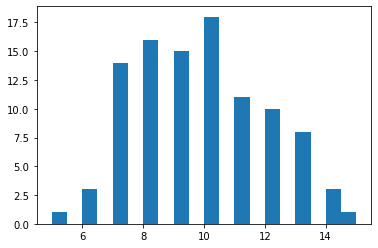

In [87]:
# Plotting the randomly generated data
plt.hist(coin_flip, bins=20)

#### normal

In [66]:

# Mean
mu = 100

#Standard Deviation
sigma = 15

In [67]:
# A random example of 100 samples from a normal distribution
normal = np.random.default_rng().normal(mu, sigma, 100)

In [68]:
normal

array([ 93.28148483, 114.63915336, 110.57016508, 119.84181736,
        79.2693901 , 113.32577939, 124.41432998, 114.49535364,
        68.57117294, 116.54273883, 101.87150206, 110.54187698,
        94.37715714,  83.16720298, 117.14921409, 109.88081271,
        79.56963774,  94.75303375,  78.6278069 , 101.31840253,
       111.4162944 ,  80.86331851, 122.57305731, 121.98883436,
        93.26549408,  90.16429614, 100.12340201, 124.48192951,
        89.12893233, 110.19474602,  91.83131168,  85.47209835,
        98.79830189, 111.99197272,  98.55326559, 122.73922005,
       123.35652948, 111.14502481, 103.80819454,  98.79620199,
       138.08615324,  89.89694029, 112.6692858 ,  92.92703291,
       112.30653003, 132.95387199,  83.68206209,  83.49241701,
       119.81137036, 109.07345671,  88.05844605,  77.75699645,
        91.23406611, 104.8151707 ,  85.81805339, 110.28137446,
        85.92482057,  99.39280709, 104.04047855,  85.25175454,
       124.84683894, 133.80364381, 109.42145331, 103.56

(array([1., 0., 0., 0., 0., 0., 1., 3., 2., 2., 3., 2., 6., 2., 3., 2., 2.,
        4., 2., 2., 0., 4., 5., 3., 1., 3., 3., 1., 1., 8., 6., 3., 2., 2.,
        2., 2., 3., 1., 3., 1., 4., 0., 0., 0., 1., 1., 2., 0., 0., 1.]),
 array([ 68.57117294,  69.96147254,  71.35177215,  72.74207176,
         74.13237136,  75.52267097,  76.91297057,  78.30327018,
         79.69356979,  81.08386939,  82.474169  ,  83.8644686 ,
         85.25476821,  86.64506782,  88.03536742,  89.42566703,
         90.81596663,  92.20626624,  93.59656585,  94.98686545,
         96.37716506,  97.76746466,  99.15776427, 100.54806388,
        101.93836348, 103.32866309, 104.71896269, 106.1092623 ,
        107.49956191, 108.88986151, 110.28016112, 111.67046073,
        113.06076033, 114.45105994, 115.84135954, 117.23165915,
        118.62195876, 120.01225836, 121.40255797, 122.79285757,
        124.18315718, 125.57345679, 126.96375639, 128.354056  ,
        129.7443556 , 131.13465521, 132.52495482, 133.91525442,
      

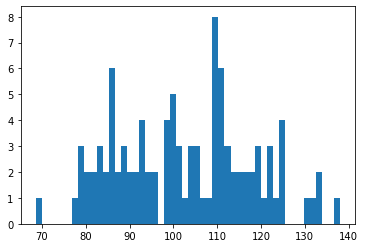

In [76]:
# While the smaller number of samples uaually are at the extremes, 
# a smaller sample size generally leads to a plot that only vaguely resembles a bell shaped curve
plt.hist(normal, bins = 50)

In [72]:
# Repeating the random generation with a higher sample size of 10000
normal_higher = np.random.default_rng().normal(mu, sigma, 10000)

(array([  1.,   2.,   2.,   1.,   2.,   8.,  12.,  15.,  37.,  47.,  57.,
         65., 106., 129., 168., 191., 272., 320., 411., 422., 452., 535.,
        589., 582., 581., 610., 614., 579., 520., 465., 413., 340., 332.,
        261., 217., 179., 122., 103.,  68.,  50.,  44.,  26.,  13.,  10.,
          6.,   7.,   5.,   2.,   4.,   3.]),
 array([ 43.34266074,  45.62578777,  47.90891479,  50.19204182,
         52.47516884,  54.75829587,  57.04142289,  59.32454992,
         61.60767694,  63.89080397,  66.17393099,  68.45705802,
         70.74018504,  73.02331207,  75.30643909,  77.58956612,
         79.87269314,  82.15582017,  84.43894719,  86.72207422,
         89.00520124,  91.28832827,  93.57145529,  95.85458232,
         98.13770934, 100.42083637, 102.70396339, 104.98709042,
        107.27021744, 109.55334447, 111.83647149, 114.11959852,
        116.40272554, 118.68585257, 120.96897959, 123.25210662,
        125.53523364, 127.81836067, 130.10148769, 132.38461472,
        134.667741

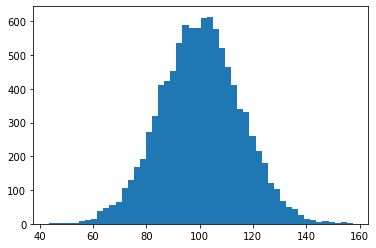

In [77]:
# The plot should more closely resemble a bell shaped curve as the sample size increases
plt.hist(normal_higher, bins = 50)

#### uniform

In [79]:
# Generating 100 random floats between 1 and 6
uniform = np.random.default_rng().uniform(1,6,100)

In [80]:
uniform

array([4.81388929, 1.24562182, 4.38655165, 2.70983105, 3.63672222,
       3.45319216, 2.74840525, 3.44267493, 1.64465366, 3.82636718,
       4.80344113, 3.8222295 , 5.06546224, 4.46124246, 4.2380013 ,
       1.49288089, 3.76745251, 3.90169705, 5.10175527, 5.40986388,
       1.08774775, 3.7871429 , 4.43517783, 4.19106577, 1.05330537,
       4.75920848, 4.10340718, 3.00676993, 1.82881064, 1.27568451,
       2.07363296, 1.76578742, 1.41190472, 4.48686101, 5.25538469,
       2.41869638, 2.53804208, 3.9003706 , 5.28816835, 1.51453231,
       3.7226385 , 4.80567478, 4.25452561, 1.64761409, 4.18442765,
       5.88453727, 4.98566901, 1.58783356, 4.76635342, 4.08690347,
       1.64947927, 5.74939366, 4.85136872, 5.46179463, 4.47386567,
       1.78514649, 2.59127176, 2.18634678, 2.03653341, 4.18462822,
       4.15070242, 3.46058321, 1.18756298, 3.32228388, 5.79202129,
       1.78735717, 5.70452443, 5.99728214, 4.33619904, 4.01796267,
       2.82850248, 3.97685004, 5.62968308, 5.83029426, 5.96249

(array([19., 12., 10., 24., 17., 18.]),
 array([1.05330537, 1.8773015 , 2.70129763, 3.52529375, 4.34928988,
        5.17328601, 5.99728214]),
 <BarContainer object of 6 artists>)

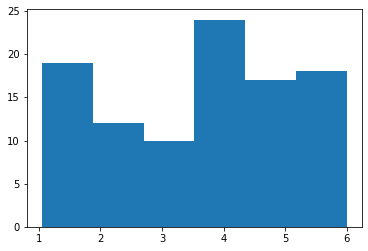

In [81]:
# As the sample size is quite small, the resulting plot may not appear uniform
# which is to be expected
# set bins to 6 as all random numbers should fall between 1 and 6
plt.hist(uniform, bins=6)

In [82]:
# Repeating the random generation with a higher sample size of 10000
uniform_higher = uniform = np.random.default_rng().uniform(1,6,10000)

(array([1638., 1625., 1671., 1736., 1669., 1661.]),
 array([1.00020125, 1.83346351, 2.66672576, 3.49998802, 4.33325028,
        5.16651254, 5.99977479]),
 <BarContainer object of 6 artists>)

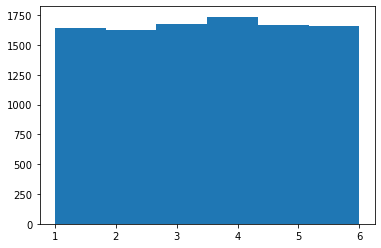

In [84]:
# As the sample size increases, the distribition becoms more smooth
plt.hist(uniform_higher, bins=6)

#### poisson

In [97]:
poisson = rng.poisson(100, 10000)

In [98]:
poisson

array([119,  92, 109, ..., 134, 101,  89], dtype=int64)

(array([   2.,    2.,    7.,   19.,   53.,  121.,  234.,  395.,  588.,
         792., 1061., 1164., 1161., 1140.,  999.,  792.,  567.,  378.,
         245.,  136.,   86.,   26.,   18.,    9.,    5.]),
 array([ 62.  ,  65.04,  68.08,  71.12,  74.16,  77.2 ,  80.24,  83.28,
         86.32,  89.36,  92.4 ,  95.44,  98.48, 101.52, 104.56, 107.6 ,
        110.64, 113.68, 116.72, 119.76, 122.8 , 125.84, 128.88, 131.92,
        134.96, 138.  ]),
 <BarContainer object of 25 artists>)

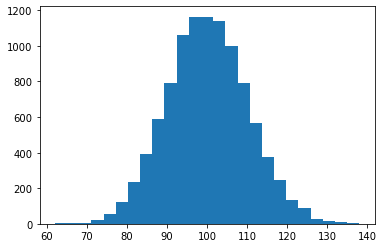

In [99]:
plt.hist(poisson, bins=25)

#### exponential

In [114]:
exponential = rng.exponential(10.0, 100)

In [115]:
exponential

array([ 7.46767866,  4.62999363,  3.69042419, 11.25889227,  1.53173888,
        8.25523348,  1.92068415,  8.83022385,  8.98131424, 10.90486094,
       53.75721764,  4.04627383,  0.24214217, 31.75776846, 20.67685846,
        2.5453692 , 15.63410442,  7.09698022,  0.30588195, 13.68836992,
        7.92064794,  1.2872746 , 12.41287948,  8.9686599 ,  8.0997158 ,
       34.44078822, 10.47136062,  0.8911693 ,  5.43901964,  9.01746438,
       13.78594282, 10.84637473,  5.15509384, 15.16578684,  1.19269259,
        0.13551235, 10.10789677,  1.74628356, 16.38710393, 34.46646518,
        3.62104563, 26.25709926,  3.5993514 , 11.10293796,  0.25856022,
        6.95903681,  1.62152078, 13.40293417, 16.28051147,  2.73170907,
        5.16740709,  2.31812764, 14.49159112, 17.62837252,  1.91919277,
        5.10008551,  0.61749516, 35.63214928,  6.35174312,  8.57171886,
        0.28672379, 17.71560439,  6.19439921,  2.96477573, 26.38861933,
       26.55872709,  6.7096933 ,  6.40469947,  2.84888358, 14.15

(array([14., 10.,  6.,  6.,  7.,  8.,  4.,  8.,  4.,  5.,  1.,  4.,  3.,
         3.,  3.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,
         0.,  1.,  0.,  2.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.13551235,  1.28116829,  2.42682423,  3.57248017,  4.71813612,
         5.86379206,  7.009448  ,  8.15510394,  9.30075988, 10.44641583,
        11.59207177, 12.73772771, 13.88338365, 15.0290396 , 16.17469554,
        17.32035148, 18.46600742, 19.61166337, 20.75731931, 21.90297525,
        23.04863119, 24.19428713, 25.33994308, 26.48559902, 27.63125496,
        28.7769109 , 29.92256685, 31.06822279, 32.21387873, 33.35953467,
        34.50519062, 35.65084656, 36.7965025 , 37.94215844, 39.08781439,
        40.23347033, 41.37912627, 42.52478221, 43.67043815, 44.8160941 ,
        45.96175004, 47.10740598, 48.25306192, 49.39871787, 50.54437381,
        51.69002975, 52.83568569, 53.98134164, 55.12699758,

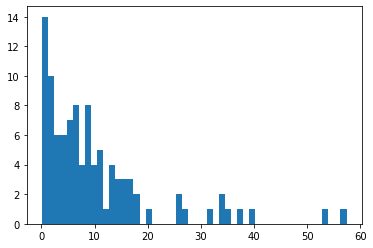

In [122]:

plt.hist(exponential, bins=50)

In [118]:
# Repeating the random generation with a higher sample size of 10000
exponential_higher = rng.exponential(10.0, 10000)

(array([1.756e+03, 1.434e+03, 1.162e+03, 1.008e+03, 7.900e+02, 6.990e+02,
        5.600e+02, 4.410e+02, 3.710e+02, 2.730e+02, 2.440e+02, 2.230e+02,
        1.920e+02, 1.530e+02, 1.040e+02, 1.080e+02, 7.700e+01, 6.400e+01,
        6.200e+01, 4.500e+01, 4.800e+01, 3.000e+01, 2.800e+01, 2.900e+01,
        1.700e+01, 1.900e+01, 1.300e+01, 9.000e+00, 7.000e+00, 4.000e+00,
        8.000e+00, 6.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.33772586e-03, 1.89213187e+00, 3.78292601e+00, 5.67372015e+00,
        7.56451429e+00, 9.45530843e+00, 1.13461026e+01, 1.32368967e+01,
        1.51276908e+01, 1.70184850e+01, 1.89092791e+01, 2.08000733e+01,
        2.26908674e+01, 2.45816615e+01, 2.64724557e+01, 2.83632498e+01,
        3.02540440e+01, 3.21448381e+01, 3.40356322e+01, 3.59264264e+01,
        3.781722

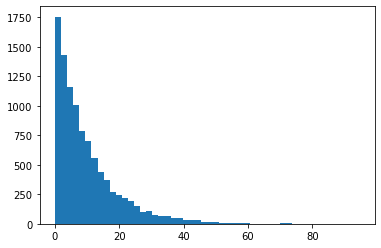

In [123]:
# As the sample size increases, the distribition becoms more smooth
plt.hist(exponential_higher, bins=50)

## Seeds

## References